In [ ]:
# Mengakses google drive ke dalam google colaboratory
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Inisiasi directory tempat data akan dibaca dan disimpan
path = '/content/gdrive/MyDrive/Course/Pokemon.csv'
# Read the Excel file
df = pd.read_csv(path)
# Menampilkan 5 urutan teratas dari data
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
# Mencari ukuran data
df.shape

(800, 13)

In [ ]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
# Cek missing value
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [ ]:
# Handling missing value dengan drop data
df = df.dropna(axis=0)

# Cek kembali missing value
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [ ]:
# Mencari ukuran data
df.shape

(414, 13)

In [ ]:
# Melihat Informasi Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 414 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           414 non-null    int64 
 1   Name        414 non-null    object
 2   Type 1      414 non-null    object
 3   Type 2      414 non-null    object
 4   Total       414 non-null    int64 
 5   HP          414 non-null    int64 
 6   Attack      414 non-null    int64 
 7   Defense     414 non-null    int64 
 8   Sp. Atk     414 non-null    int64 
 9   Sp. Def     414 non-null    int64 
 10  Speed       414 non-null    int64 
 11  Generation  414 non-null    int64 
 12  Legendary   414 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 42.5+ KB


In [ ]:
# Mencari duplicate data
duplicate = df[df.duplicated()]

# Display data yang duplicate
duplicate

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [ ]:
# Menampilkan kolom/variabel dengan tipe data non-metric atau string
non_metric = list(df.select_dtypes(include=['object']).columns)
df[non_metric].head()

,Name,Type 1,Type 2
0,Bulbasaur,Grass,Poison
1,Ivysaur,Grass,Poison
2,Venusaur,Grass,Poison
3,VenusaurMega Venusaur,Grass,Poison
6,Charizard,Fire,Flying


In [ ]:
# Berapakah jumlah nilai yang unik pada setiap variabel?
df[non_metric].agg(['nunique','count'])

,Name,Type 1,Type 2
nunique,414,18,18
count,414,414,414


In [ ]:
# Membuat analisis berdasarkan nama pokemon dan mencari tahu informasi
# seperti unique value, total data, dan modus pada setiap variabel
df.groupby('Name').agg(['nunique','count',pd.Series.mode]).stack()

#  Type 1  Type 2  Total   HP  Attack  \
Name                                                                       
Abomasnow               nunique    1       1       1      1    1       1   
                        count      1       1       1      1    1       1   
                        mode     460   Grass     Ice    494   90      92   
AbomasnowMega Abomasnow nunique    1       1       1      1    1       1   
                        count      1       1       1      1    1       1   
...                              ...     ...     ...    ...  ...     ...   
Zweilous                count      1       1       1      1    1       1   
                        mode     634    Dark  Dragon    420   72      85   
Zygarde50% Forme        nunique    1       1       1      1    1       1   
                        count      1       1       1      1    1       1   
                        mode     718  Dragon  Ground    600  108     100   

                                 Defense  Sp. Atk  Sp. Def  Speed  Generation  \
Name                                                                            
Abomasnow               nunique        1        1        1      1           1   
                        count          1        1        1      1           1   
                        mode          75       92       85     60           4   
AbomasnowMega Abomasnow nunique        1        1        1      1           1   
                        count          1        1        1      1           1   
...                                  ...      ...      ...    ...         ...   
Zweilous                count          1        1        1      1           1   
                        mode          70       65       70     58           5   
Zygarde50% Forme        nunique        1        1        1      1           1   
                        count          1        1        1      1           1   
                        mode         121       81       95     95           6   

                                Legendary  
Name                                       
Abomasnow               nunique         1  
                        count           1  
                        mode        False  
AbomasnowMega Abomasnow nunique         1  
                        count           1  
...                                   ...  
Zweilous                count           1  
                        mode        False  
Zygarde50% Forme        nunique         1  
                        count           1  
                        mode         True  

[1242 rows x 12 columns]

In [ ]:
# Melihat summary dari data Pokemon baru
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,376.565217,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628
std,212.840297,120.849502,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010
min,1.000000,190.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000
25%,205.500000,355.000000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000
50%,378.000000,475.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000
75%,560.750000,529.500000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000


from matplotlib import pyplot as plt
_df_0['#'].plot(kind='hist', bins=20, title='#')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['HP'].plot(kind='hist', bins=20, title='HP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Attack'].plot(kind='hist', bins=20, title='Attack')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='#', y='Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Total', y='HP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='HP', y='Attack', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Attack', y='Defense', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['#'].plot(kind='line', figsize=(8, 4), title='#')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['HP'].plot(kind='line', figsize=(8, 4), title='HP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Attack'].plot(kind='line', figsize=(8, 4), title='Attack')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Menampilkan 5 urutan terakhir dari data
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


from matplotlib import pyplot as plt
_df_62['#'].plot(kind='hist', bins=20, title='#')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_63['Total'].plot(kind='hist', bins=20, title='Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['HP'].plot(kind='hist', bins=20, title='HP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['Attack'].plot(kind='hist', bins=20, title='Attack')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_66.groupby('Name').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_67.groupby('Type 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_68.groupby('Type 2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='#', y='Total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70.plot(kind='scatter', x='Total', y='HP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71.plot(kind='scatter', x='HP', y='Attack', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='Attack', y='Defense', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['Total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_73.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('Total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['Total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_74.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Type 1')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type 1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('Total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['Total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_75.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Type 2')):
  _plot_series(series, series_name, i)
  fig.legend(title='Type 2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('Total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['#']
  ys = series['Attack']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_76.sort_values('#', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Name')):
  _plot_series(series, series_name, i)
  fig.legend(title='Name', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('#')
_ = plt.ylabel('Attack')

from matplotlib import pyplot as plt
_df_77['#'].plot(kind='line', figsize=(8, 4), title='#')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_78['Total'].plot(kind='line', figsize=(8, 4), title='Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_79['HP'].plot(kind='line', figsize=(8, 4), title='HP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_80['Attack'].plot(kind='line', figsize=(8, 4), title='Attack')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type 1'].value_counts()
    for x_label, grp in _df_81.groupby('Name')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Name')
_ = plt.ylabel('Type 1')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Type 2'].value_counts()
    for x_label, grp in _df_82.groupby('Type 1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Type 1')
_ = plt.ylabel('Type 2')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_83['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_83, x='#', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_84['Type 1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_84, x='#', y='Type 1', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_85['Type 2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_85, x='#', y='Type 2', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_86['Name'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_86, x='Total', y='Name', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

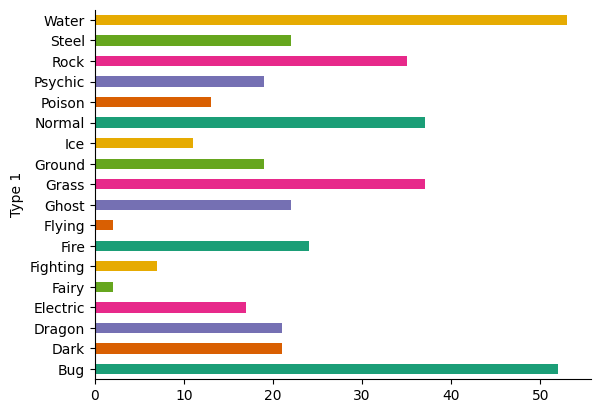

In [ ]:
df.groupby('Type 1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

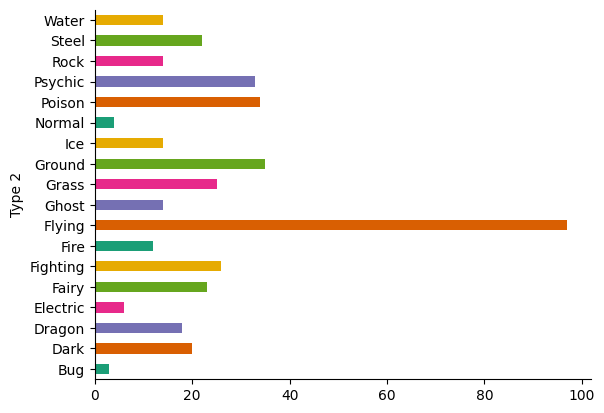

In [ ]:
df.groupby('Type 2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)